# OBJECTF

Predire $\rho$, $\sigma_a$ et $\sigma_c$ en fonction de $E_r$, $F_r$, et $T_r$ a droite du domaine en toute temps 

# PREPARATION

## Les imports

In [176]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval as l_eval

## Chargement des donnees

In [177]:
# """ VERSION COLAB """

# # to load data from my personal github repo (update it if we have to)
# import os
# if not os.path.exists("assets"):
#     print("Data wansn't here. Let's download it!")
#     !git clone https://github.com/desmond-rn/assets.git
# else:
#     print("Data already here. Let's update it!")
#     %cd assets
#     # %rm -rf assets
#     !git pull https://github.com/desmond-rn/assets.git
#     %cd ..

# print("\n")
# !ls assets/dataframes/inverse

# df_path = "assets/dataframes/inverse/df_temporal.csv"

In [178]:
# """ VERSION JUPYTER """

# to load data locally

%ls "../../data"

df_t_path = "../../data/df_temporal.csv"
df_s_path = "../../data/df_spatial.csv"

 Volume in drive C has no label.
 Volume Serial Number is 2248-85E1

 Directory of C:\Users\Roussel\Dropbox\Unistra\SEMESTRE 2\Projet & Stage\Inverse\REPO\data

21-Jun-20  12:53 PM    <DIR>          .
21-Jun-20  12:53 PM    <DIR>          ..
21-Jun-20  12:53 PM    <DIR>          anim
24-Jun-20  12:45 PM            14,903 case_1_spatial.csv
24-Jun-20  12:45 PM            30,376 case_1_temporal.csv
24-Jun-20  12:45 PM            10,954 case_2_spatial.csv
24-Jun-20  12:45 PM            22,400 case_2_temporal.csv
24-Jun-20  12:45 PM            10,923 case_3_spatial.csv
21-Jun-20  12:53 PM            62,201 dataframe_1.csv
21-Jun-20  12:53 PM            89,950 dataframe_2.csv
21-Jun-20  12:53 PM             1,396 df_1.csv
22-Jun-20  07:11 AM            47,585 df_1_test.csv
21-Jun-20  12:53 PM             1,486 df_2.csv
22-Jun-20  07:11 AM            54,818 df_2_test.csv
24-Jun-20  12:45 PM           106,007 df_spatial.csv
24-Jun-20  12:45 PM           142,239 df_temporal.csv
21-Jun-20  12:5

## Donnees temporelles

In [179]:
types = {'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str}
converters={'t':l_eval, 'E_l':l_eval, 'F_l':l_eval, 'T_l':l_eval, 'E_r':l_eval, 'F_r':l_eval, 'T_r':l_eval}      # on veut convertir les str en listes

df_t = pd.read_csv(df_t_path, thousands=',', dtype=types, converters=converters)

df_t.head(2)

,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,...,T_0_expr,dt,step_count,t,E_l,F_l,T_l,E_r,F_r,T_r
0,0,1,500,299,0.01372,0.14361,0.99,0.000001,0,0.005,...,5,0.000007,756,"[0, 6.62207e-06, 1.32441e-05, 1.98662e-05, 2.6...","[8.575, 8.575, 8.67744, 8.78122, 8.88515, 8.98...","[0, 0, 0.101438, 0.204196, 0.306153, 0.407534,...","[5, 5, 5, 5.01444, 5.02936, 5.04419, 5.05882, ...","[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,0,1,500,299,0.01372,0.14361,0.99,0.000001,0,0.005,...,5,0.000007,756,"[0, 6.62207e-06, 1.32441e-05, 1.98662e-05, 2.6...","[8.575, 8.575, 8.67744, 8.78122, 8.88515, 8.98...","[0, 0, 0.101438, 0.204196, 0.306153, 0.407534,...","[5, 5, 5, 5.01444, 5.02936, 5.04419, 5.05882, ...","[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."


## Donnees spatiales

In [180]:
types = {'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str}
converters={'x':l_eval, 'rho':l_eval, 'sigma_a':l_eval, 'sigma_c':l_eval, 'E_0':l_eval, 'F_0':l_eval, 'T_0':l_eval, 'E':l_eval, 'F':l_eval, 'T':l_eval}

df_s = pd.read_csv(df_s_path, thousands=',', dtype=types, converters=converters)

df_s.head(2)

,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,...,x,rho,sigma_a,sigma_c,E_0,F_0,T_0,E_f,F_f,T_f
0,0,1,500,299,0.01372,0.14361,0.99,0.000001,0,0.005,...,"[0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4.96736, 4.9516, 4.93594, 4.92041, 4.90504, 4...","[4.96736, 4.9516, 4.93594, 4.92041, 4.90504, 4...","[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[8.45916, 8.35269, 8.2477, 8.14437, 8.04286, 7...","[0.10119, -0.0023666, -0.104948, -0.206385, -0...","[4.96736, 4.9516, 4.93594, 4.92041, 4.90504, 4..."
1,0,1,500,299,0.01372,0.14361,0.99,0.000001,0,0.005,...,"[0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4.96005, 4.94477, 4.92963, 4.91463, 4.89982, ...","[4.96005, 4.94477, 4.92963, 4.91463, 4.89982, ...","[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[8.41434, 8.31166, 8.21057, 8.11123, 8.01379, ...","[0.145578, 0.0377804, -0.069139, -0.175001, -0...","[4.96005, 4.94477, 4.92963, 4.91463, 4.89982, ..."


## Prerequis pour cet apprentissage

Tous les unputs doivent etre similaires sur un certain nombre de leurs parametres.

In [181]:
# assert t_f = 0.005 

## Visualisation

In [182]:
""" Visualisons les signaux sur la droite et la densite sur le domaine """

def plot_inputs(ax, df_t, index):
    t = np.array(df_t.loc[index, 't'])
    
    # inputs
    E_r = np.array(df_t.loc[index, 'E_r'])
    F_r = np.array(df_t.loc[index, 'F_r'])
    T_r = np.array(df_t.loc[index, 'T_r'])

    # plot 
    ax[0].plot(t, E_r, 'b', label='énergie à droite', lw=3)
    ax[0].set_ylim(8.275, 8.875)
    ax[0].set_xlabel('t')
    ax[0].legend()

    ax[1].plot(t, F_r, 'y', label='flux à droite', lw=3)
    ax[1].set_ylim(-0.25, 0.25)
    ax[1].set_xlabel('t') 
    ax[1].legend()

    ax[2].plot(t, T_r, 'r', label='température à droite', lw=3)
    ax[2].set_ylim(4.96, 5.04)
    ax[2].set_xlabel('t')
    ax[2].legend()
    
def plot_output(ax, df_s, index):
    x = np.array(df_s.loc[index, 'x'])
    rho = np.array(df_s.loc[index, 'rho'])

    # plot 
    ax.plot(x, rho, 'm--', label='densité')
    ax.set_ylim(0.5, 10.5)
    ax.set_xlabel('x')
    ax.legend()

In [183]:
def plot_io(index):
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    fig.delaxes(ax[1][0])
    fig.delaxes(ax[1][2])

    plot_inputs(ax[0], df_t, index)
    plot_output(ax[1, 1], df_s, index)
    plt.tight_layout()

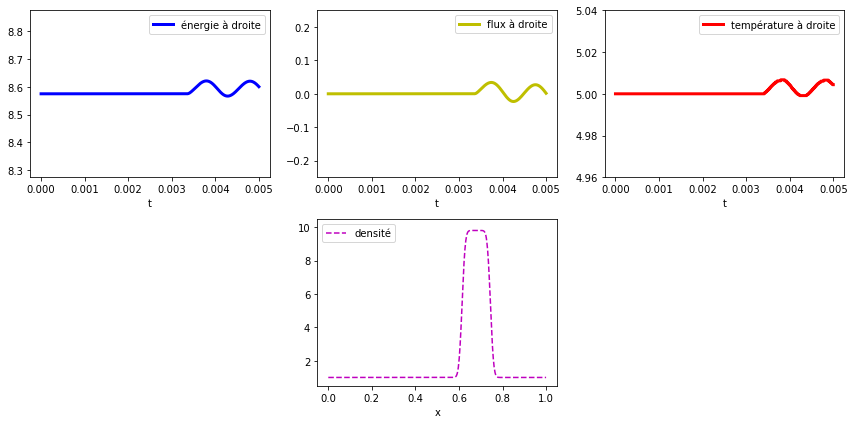

In [187]:
index = 2
plot_io(index)

## Resampling des signaux d'entre

In [185]:
""" Fonction pour recuperer 20 pas d'iterations """

" Fonction pour recuperer 20 pas d'iterations "

## Detection des crenaux a la sortie

# APPRENTISSAGE